In [1]:
import sys, pathlib
sys.path.insert(0, str(pathlib.Path('/home/akazemi3/untrained_models_of_visual_cortex').resolve()))

In [2]:
import os
from code_.encoding_score.rsa import compute_rsa_majajhong, compute_rsa_nsd
from code_.model_activations.loading import load_full_identifier
from config import FIGURES
from code_.model_activations.configs import model_cfg as cfg

In [3]:
dataset = 'majajhong_demo'
region = 'IT'

# dataset = 'naturalscenes'
# region = 'ventral visual stream'

In [12]:
rsa_dict = {}
models = ['expansion','fully_connected','vit']
alexnet_iden = f'alexnet_trained_features=None_layers=5_dataset={dataset}'

for model_name in models:
    print(f'computing RSA for model: {model_name}')
    rsa_dict[model_name] = []
    model_idens = []
    for features in cfg[dataset]['models'][model_name]['features']:
        activation_iden = load_full_identifier(model_name=model_name, 
                             features = features, 
                             layers=cfg[dataset]['models'][model_name]['layers'], 
                             dataset=dataset)
        model_idens.append(activation_iden) 
    for iden in model_idens:
        rsa_dict[model_name].append(compute_rsa_majajhong(iden, region, demo=True))

print(f'computing RSA for model: alexnet')
rsa_alexnet = compute_rsa_majajhong(iden=alexnet_iden,region=region, demo=True)
      

computing RSA for model: expansion
/data/atlas/expansion_cache expansion_features=3_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 89.64it/s]


/data/atlas/expansion_cache expansion_features=30_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 107.49it/s]


/data/atlas/expansion_cache expansion_features=300_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 97.86it/s]


computing RSA for model: fully_connected
/data/atlas/expansion_cache fully_connected_features=108_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 121.42it/s]


/data/atlas/expansion_cache fully_connected_features=1080_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 120.20it/s]


/data/atlas/expansion_cache fully_connected_features=10800_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 112.70it/s]


computing RSA for model: vit
/data/atlas/expansion_cache vit_features=12_layers=None_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 119.58it/s]


/data/atlas/expansion_cache vit_features=60_layers=None_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 111.72it/s]


/data/atlas/expansion_cache vit_features=600_layers=None_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 48.43it/s]


computing RSA for model: alexnet
/data/atlas/expansion_cache alexnet_trained_features=None_layers=5_dataset=majajhong_demo


100%|██████████| 2/2 [00:00<00:00, 106.26it/s]


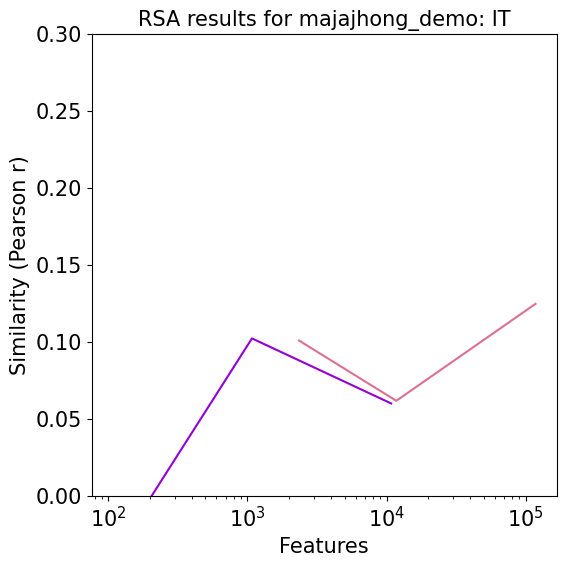

In [15]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
# from notebooks.plotting_tools import *

rcParams['figure.figsize'] = (6,6)  
legend_dict ={'expansion':('Convolutional','royalblue'),
        'vit':('Transformer','palevioletred'),
        'fully_connected':('Fully connected','darkviolet')}

# main plot
for model_name in models:
    features = cfg[dataset]['models'][model_name]['features']
    if model_name == 'expansion':
        features = [f*36 for f in features] 
    elif model_name == 'vit':
        features = [f*196 for f in features] 
    else:
        pass
    
    ax1 = sns.lineplot(x=features, 
                       y=rsa_dict[model_name], 
                       c=legend_dict[model_name][1], 
                       label=legend_dict[model_name][0])
# alexnet 
plt.axhline(y=rsa_alexnet, color='gray', linestyle='--', label='AlexNet')

plt.xlabel('Features',size=15)
plt.ylabel('Similarity (Pearson r)',size=15)
plt.ylim(0,0.3) if dataset == 'naturalscenes' else plt.ylim(0,0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(f'RSA results for {dataset}: {region}',size=15)
ax1.set_xscale("log")    
if region != 'V4':
    ax1.legend()
    ax1.get_legend().remove()
plt.show()